<a href="https://colab.research.google.com/github/chcmagalhaes/DS_Projetos/blob/master/Analise_Dados_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science na Prática 2.0**

**Projeto 02**

*by [Carlos Henrique Magalhães](https://github.com/chcmagalhaes)*

Sob orientação:

- [Sigmoidal](https://sigmoidal.ai)



 ![Rio de Janeiro](https://i0.wp.com/www.mdl.com.br/wp-content/uploads/2019/09/cidade-do-rio-de-janeiro.png?w=950&ssl=1)


# Analisando a Violência no Rio de Janeiro 

O Rio de Janeiro é uma grande cidade brasileira à beira-mar, famosa pelas praias de Copacabana e Ipanema, pela estátua de 38 metros de altura do Cristo Redentor, no topo do Corcovado, e pelo Pão de Açúcar, um pico de granito com teleféricos até seu cume. A cidade também é conhecida pelas grandes favelas. O empolgante Carnaval, com carros alegóricos, fantasias extravagantes e sambistas, é considerado o maior do mundo.

Juntos, vamos analisar os principais crimes registrados e disponiveis no ISPDados (Portal de Dados abertos do Institto de Segurança Pública). A série disposta desde 1991.







###Obtenção dos Dados
Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente neste link.

Saiba mais em: [ISPDados RJ](http://www.ispdados.rj.gov.br/)

#### Importar Dados e Bibliotecas para Analise:

In [3]:
#importar Pandas e Numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')


##Análise Inicial dos Dados:


Breve verificação dos dados, para prévia analisa do nosso data frame. 


Tamanho da Tabela:

In [4]:
#df.head()
df.shape

(344, 56)

Visão das Colunas:

In [5]:
#Descrição das colunas 

df.columns


Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [5]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

## Analisando dados vazios:

Faremos uma rapida analise dos dados, percentualmente, para que tenhamos noção antes de calcular qualquer informação:

In [6]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Classificando os dados vazios, podemos verificar que alguns campos não estão ou  foram totalmente preenchidos de forma errada:

roubo_bicicleta               
furto_bicicleta

Podemos então supor que, estes dados não estão sendo medidos desde o inicio da medição, ou então a medição foi realizada por um outro orgão ou, por ultimo foram compudados da forma errada. 



### Informações Estatísticas da Violência no Rio de Janeiro.

In [7]:
#Visualizar as 5 primeiras entradas
df.head()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Usando o método describe() podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

*   Identificar outliers.
*   Entender melhor a distribuição dos dados.
*   Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.
*   Identificar falhas na distribuição dos dados.






In [8]:
# Aplicando o método describe:

df.describe()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Abaixo, podemos ver que a média de roubo de veículos  desde 1991, por mês:

In [15]:
# ver a média da variável roubo_veiculo
mean_roubo_veiculo = df.roubo_veiculo.mean()

print (round(mean_roubo_veiculo,2))

2448.7


Abaixo, podemos ver a média de roubo de veiculos:

In [19]:
#ver a média variavel furto Veiculos 

mean_furto_veiculo = df.furto_veiculos.mean()

print (round(mean_furto_veiculo,2))

1674.67



Para visualização, segue a média também, dos veiculos recuperados:

In [20]:
#ver a média variavel recuperação de veiculos

mean_recup_veiculo = df.recuperacao_veiculos.mean()

print (round(mean_recup_veiculo,2))

1772.24


In [52]:
#Média Percentual de recuperação dos carros em relação aos carros roubados + carros furtados:

mean_recup_per = (mean_recup_veiculo / (mean_roubo_veiculo + mean_furto_veiculo)) *100
total_carros = mean_furto_veiculo + mean_roubo_veiculo

print('Média dos carros Perdidos por mês - Roubados + Furtados: {:.2f}'.format(total_carros))
print('Desse percentual,são recuperados: {:.2f}%'.format(mean_recup_per))
 


Média dos carros Perdidos por mês - Roubados + Furtados: 4123.37
Desse percentual,são recuperados: 42.98%


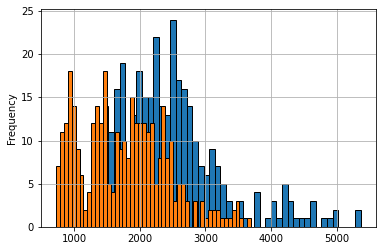

In [80]:
#Grafico Percentual Recp mes:

df.roubo_veiculo.plot.hist(bins = 50, edgecolor='black');
df.recuperacao_veiculos.hist(bins= 50,edgecolor='black');


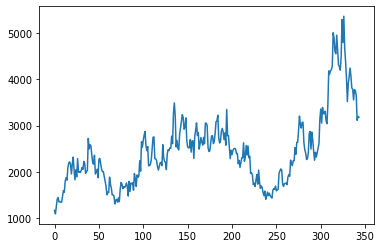

In [82]:
#Grafico 2 - Média de Roubo De veiculo

df.roubo_veiculo.plot();

Mesmo chegando a 42% de veiculos recuperados, esse numero vem aumentando ao longo do tempo. 

Mesmo podemos 

Visualização de dados:

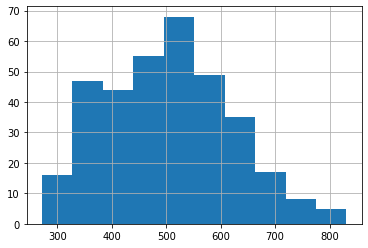

In [25]:
#grafico Homicidio Dolloso Rio de Janeiro.    

df.hom_doloso.hist();

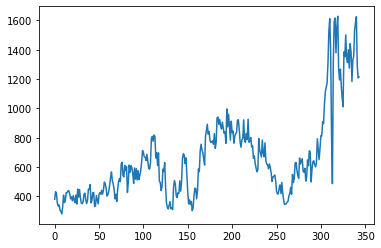

In [27]:
#Grafico de linhas, para o roubo em coletivo:

df.roubo_em_coletivo.plot();

## Roubo de Cargas RJ 
Vamos analisar agora um pouco mais o Roubo de cargas no Estado do Rio de Janeiro, com base nas informações 

Fator esse que influencia muito no custo de frete, insumos e no fator de segurança neste estado

In [86]:
#Média de roubos de Carga -

min_roubo_carga = df.roubo_carga.min()
max_roubo_carga = df.roubo_carga.max()


#imprimir os valores máximos e mínimos

print("Min:\t{}".format(min_roubo_carga))
print("Max:\t{}".format(max_roubo_carga))


Min:	59
Max:	1329


In [68]:
# Verificar mes dos valores correspondem ao mínimo;
df[df.roubo_carga == 59]


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
57,1995,10,565,NaN,18,NaN,160,3207,NaN,NaN,NaN,361,122,1806,59,867,486,37,NaN,NaN,NaN,NaN,NaN,147,3885,1819,622,NaN,NaN,NaN,2512,4953,NaN,NaN,NaN,NaN,395,NaN,NaN,NaN,1459,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,583,1353,1806,NaN,3


In [83]:
# Verificar mes dos valores correspondem ao máximo
df[df.roubo_carga == 1329]


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
311,2016,12,464,6.0,29,108.0,509,6249,403.0,183.0,2758.0,552,107,4186,1329,7632,1395,2,5.0,1796.0,5.0,71.0,13.0,2065,19158,1363,1999,758.0,1243.0,166.0,7989,13518,2.0,120.0,7.0,2805.0,2029,824.0,1090.0,153.0,2505,3065.0,780.0,1070.0,88.0,5317.0,510.0,47,3.0,4.0,0.0,607,10823,4186,67282.0,3


Os valores acima mostram que tivemos um pico mensal de roubos de cargas aconteceu em 2016, um total de 1329 casos. E em Dezembro, em um ano de Olimpiadas. 

Porém, apesar da maior média ter acontecido em 2016. O maior numero de casos registrados aconteceu em 2017, como mostra o gráfico abaixo:

Min:	1021
Max:	10599


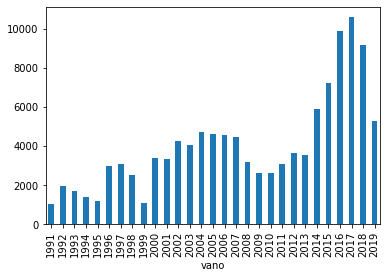

In [132]:
# Acumular dados por ANO em um novo Data Frame
df2 = df.groupby("vano").sum() 

#Plotar Grafico barras Roubo carga Rio
df2.roubo_carga.plot.bar()

max_roubo_carga2 = df2.roubo_carga.max()
min_roubo_carga2 = df2.roubo_carga.min()


print("Min:\t{}".format(min_roubo_carga2))
print("Max:\t{}".format(max_roubo_carga2))

 

Apesar do alto numero em 2017 a tendencia nos ultimos anos o número total vem declinando. 


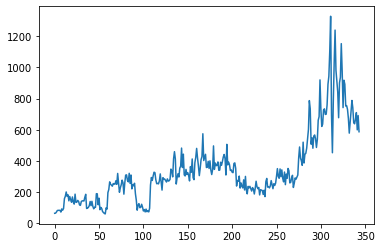

In [143]:
#Grafico Linha Roubo Carga
df.roubo_carga.plot();


Segundo a FIRJAN

  *A segurança pública tem papel fundamental para o desenvolvimento socioeconômico. Regiões consideradas mais
violentas têm dificuldade em reter e atrair investimentos, gerar empregos e renda. O estado do Rio de Janeiro
sofreu uma escalada na criminalidade, principalmente entre os anos de 2013 e 20171
. Dentro desse contexto,
temos o roubo de carga como um dos crimes que mais cresceram no estado.
Em 2018, com os investimentos realizados no período da intervenção federal 
(como softwares, equipamentos,
viaturas, coletes e armamentos) e, principalmente, devido à atuação integrada das forças de segurança pública3
,
o estado do Rio de Janeiro apresentou sua primeira quebra no padrão de consecutivos aumentos no indicador de
roubo de carga...*

*Dados disponiveis em  [FIRJAN](http://www.firjan.com.br/publicacoes): * 

#### *Conclusão*


O Rio de Janeiro é uma grande cidade, com tudo, há seus problemas que não são novos. Porém, como vimos representados nesse dataset. Há inumeras possibilidades de medir o crescimento e atuar no combate. Assim como fez a FIRJAN, quanto ao roubo de carga. 

Há um caminho longo, mas com toda certeza será muito próspero pra essa cidade. 


